# Imports and Data Load

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

In [2]:
tf_df = pickle.load(open(r"Data\tf_df.pickle","rb"))

# Base Model

## Train Test Validation Split
- Using 80% of the data to train

In [3]:
X_tf = np.array(tf_df.drop('views',axis=1))
y_tf = tf_df['views']
X_train, X_test, y_train, y_test = train_test_split(X_tf,y_tf,test_size=150,random_state=4521)
X_train_f,X_val,y_train_f,y_val = train_test_split(X_train,y_train,test_size=100,random_state=4521)

## Modeling

### Loss on RMSE

In [4]:
# Building Model
model_mse = models.Sequential()
model_mse.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mse.add(layers.Dense(units=50,activation='relu'))
model_mse.add(layers.Dropout(rate=0.3))
model_mse.add(layers.Dense(units=50,activation='relu'))
model_mse.add(layers.Dropout(rate=0.3))
model_mse.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mse.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [5]:
# Training Step
history_mse = model_mse.fit(X_train_f, y_train_f, batch_size=5,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
201/201 [==============================] - 0s 1ms/step - loss: 22847086592.0000 - mse: 22847086592.0000 - val_loss: 22473508864.0000 - val_mse: 22473508864.0000
Epoch 2/50
201/201 [==============================] - 0s 891us/step - loss: 20211167232.0000 - mse: 20211167232.0000 - val_loss: 16044249088.0000 - val_mse: 16044249088.0000
Epoch 3/50
201/201 [==============================] - 0s 955us/step - loss: 13034438656.0000 - mse: 13034438656.0000 - val_loss: 10740827136.0000 - val_mse: 10740827136.0000
Epoch 4/50
201/201 [==============================] - 0s 823us/step - loss: 10828155904.0000 - mse: 10828156928.0000 - val_loss: 10309117952.0000 - val_mse: 10309117952.0000
Epoch 5/50
201/201 [==============================] - 0s 826us/step - loss: 10544416768.0000 - mse: 10544416768.0000 - val_loss: 10122588160.0000 - val_mse: 10122588160.0000
Epoch 6/50
201/201 [==============================] - 0s 858us/step - loss: 10478239744.0000 - mse: 10478239744.0000 - val_loss: 100

201/201 [==============================] - 0s 836us/step - loss: 3610275584.0000 - mse: 3610275584.0000 - val_loss: 14193505280.0000 - val_mse: 14193505280.0000
Epoch 49/50
201/201 [==============================] - 0s 866us/step - loss: 3750103040.0000 - mse: 3750103040.0000 - val_loss: 14251738112.0000 - val_mse: 14251738112.0000
Epoch 50/50
201/201 [==============================] - 0s 823us/step - loss: 3440093184.0000 - mse: 3440093184.0000 - val_loss: 14713586688.0000 - val_mse: 14713586688.0000


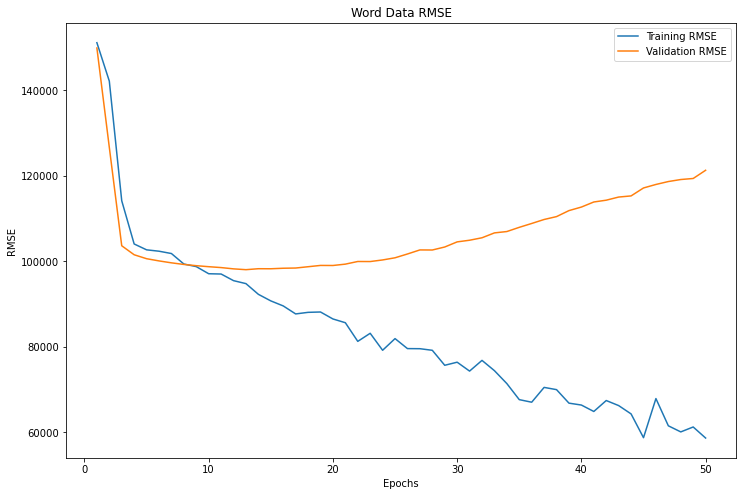

In [6]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mse.history

rmse_values = np.sqrt(model_dict['mse']) 
val_rmse_values = np.sqrt(model_dict['val_mse'])

epochs = range(1, len(rmse_values) + 1)
ax.plot(epochs, rmse_values, label='Training RMSE')
ax.plot(epochs, val_rmse_values, label='Validation RMSE')
plt.legend()
plt.title('Word Data RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

### Loss on MAE

In [7]:
# Building Model
model_mae = models.Sequential()
model_mae.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mae.add(layers.Dense(units=50,activation='relu'))
model_mae.add(layers.Dropout(rate=0.3))
model_mae.add(layers.Dense(units=50,activation='relu'))
model_mae.add(layers.Dropout(rate=0.3))
model_mae.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mae.compile(optimizer='adam',
             loss='mae',
             metrics=['mae'])

In [8]:
# Training Step
history_mae = model_mae.fit(X_train_f, y_train_f, batch_size=5,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
201/201 [==============================] - 0s 1ms/step - loss: 107085.7422 - mae: 107085.7422 - val_loss: 105394.7031 - val_mae: 105394.7031
Epoch 2/50
201/201 [==============================] - 0s 836us/step - loss: 89874.2422 - mae: 89874.2422 - val_loss: 62858.3008 - val_mae: 62858.3008
Epoch 3/50
201/201 [==============================] - 0s 803us/step - loss: 56047.0273 - mae: 56047.0273 - val_loss: 51712.5859 - val_mae: 51712.5859
Epoch 4/50
201/201 [==============================] - 0s 818us/step - loss: 52275.2969 - mae: 52275.2969 - val_loss: 50556.4297 - val_mae: 50556.4297
Epoch 5/50
201/201 [==============================] - 0s 913us/step - loss: 50467.1992 - mae: 50467.1992 - val_loss: 49543.1953 - val_mae: 49543.1953
Epoch 6/50
201/201 [==============================] - 0s 819us/step - loss: 48692.0195 - mae: 48692.0195 - val_loss: 48841.0391 - val_mae: 48841.0391
Epoch 7/50
201/201 [==============================] - 0s 798us/step - loss: 47394.2109 - mae: 4739

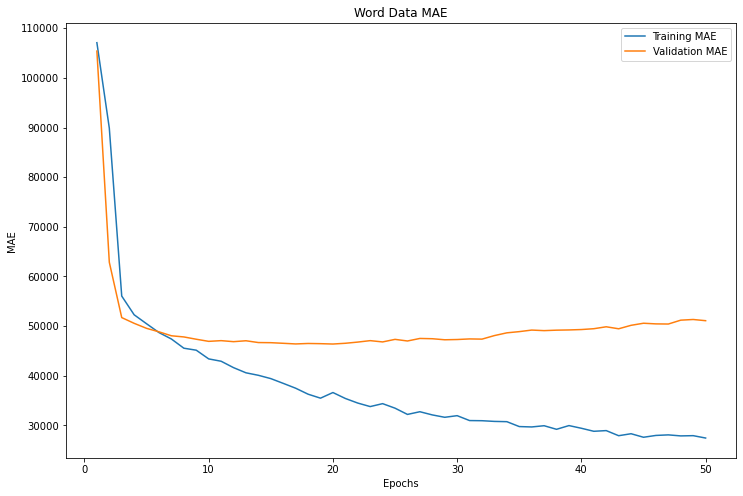

In [9]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mae.history

mae_values = model_dict['mae']
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.legend()
plt.title('Word Data MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Model After Removing Outliers

## Outlier Removal using IQR along with Train Test Validation Split

In [10]:
round(y_train.describe(),2)

count       1102.00
mean      107397.09
std       106641.20
min         8088.00
25%        54421.00
50%        81922.00
75%       127335.75
max      1783323.00
Name: views, dtype: float64

In [11]:
iqr_df = pickle.load(open(r"Data\tf_df.pickle","rb"))

In [12]:
X_iqr = iqr_df.drop('views',axis=1)
y_iqr = iqr_df[['views']]

X_train_iqr,X_test_iqr,y_train_iqr,y_test_iqr = train_test_split(X_iqr,y_iqr,test_size=150,random_state=4521)

In [13]:
# Obtaining Lower and Upper Limits using IQR
q25 = y_train_iqr['views'].describe()['25%']
q75 = y_train_iqr['views'].describe()['75%']
iqr = q75-q25
low_lim = q25-1.5*iqr
upp_lim = q75+1.5*iqr

In [14]:
# Resetting Index to use to help filtering out locations of outliers
X_train_iqr.reset_index(inplace=True)
X_test_iqr.reset_index(inplace=True)
y_train_iqr.reset_index(inplace=True)
y_test_iqr.reset_index(inplace=True)

In [15]:
# Finding Indexes within range
train_keep_in = y_train_iqr['views'].index[(low_lim < y_train_iqr['views']) & (y_train_iqr['views'] < upp_lim)]
test_keep_in = y_test_iqr['views'].index[(low_lim < y_test_iqr['views']) & (y_test_iqr['views'] < upp_lim)]

In [16]:
# New Train and Test data after removing outliers based on train
X_train_iqrf = X_train_iqr.iloc[train_keep_in].drop('index',axis=1)
y_train_iqrf = y_train_iqr.iloc[train_keep_in].drop('index',axis=1)
X_test_iqrf = X_test_iqr.iloc[test_keep_in].drop('index',axis=1)
y_test_iqrf = y_test_iqr.iloc[test_keep_in].drop('index',axis=1)

In [17]:
# Validation Split
X_train_val_iqr,X_val_iqr,y_train_val_iqr,y_val_iqr = train_test_split(X_train_iqrf,
                                                                       y_train_iqrf,
                                                                       test_size=100,random_state=4521)

## Modeling P2

### Loss on RMSE

In [18]:
# Building Model
model_mse_iqr = models.Sequential()
model_mse_iqr.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mse_iqr.add(layers.Dense(units=50,activation='relu'))
model_mse_iqr.add(layers.Dropout(rate=0.3))
model_mse_iqr.add(layers.Dense(units=50,activation='relu'))
model_mse_iqr.add(layers.Dropout(rate=0.3))
model_mse_iqr.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mse_iqr.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [19]:
# Training Step
history_mse_iqr = model_mse_iqr.fit(np.array(X_train_val_iqr), y_train_val_iqr,
                                    batch_size=5,epochs=50,
                                    validation_data=(np.array(X_val_iqr),y_val_iqr))

Epoch 1/50
186/186 [==============================] - 0s 1ms/step - loss: 9682907136.0000 - mse: 9682907136.0000 - val_loss: 9275584512.0000 - val_mse: 9275582464.0000
Epoch 2/50
186/186 [==============================] - 0s 823us/step - loss: 7786053632.0000 - mse: 7786053632.0000 - val_loss: 4718100992.0000 - val_mse: 4718100992.0000
Epoch 3/50
186/186 [==============================] - 0s 828us/step - loss: 2897130496.0000 - mse: 2897130496.0000 - val_loss: 1579954560.0000 - val_mse: 1579954560.0000
Epoch 4/50
186/186 [==============================] - 0s 863us/step - loss: 1953101440.0000 - mse: 1953101440.0000 - val_loss: 1468049280.0000 - val_mse: 1468049280.0000
Epoch 5/50
186/186 [==============================] - 0s 903us/step - loss: 1848628992.0000 - mse: 1848628992.0000 - val_loss: 1356195456.0000 - val_mse: 1356195456.0000
Epoch 6/50
186/186 [==============================] - 0s 833us/step - loss: 1766126720.0000 - mse: 1766126720.0000 - val_loss: 1330060416.0000 - val_mse

186/186 [==============================] - 0s 985us/step - loss: 475054912.0000 - mse: 475054912.0000 - val_loss: 1344807680.0000 - val_mse: 1344807680.0000
Epoch 50/50
186/186 [==============================] - 0s 1ms/step - loss: 427874304.0000 - mse: 427874304.0000 - val_loss: 1334922496.0000 - val_mse: 1334922496.0000


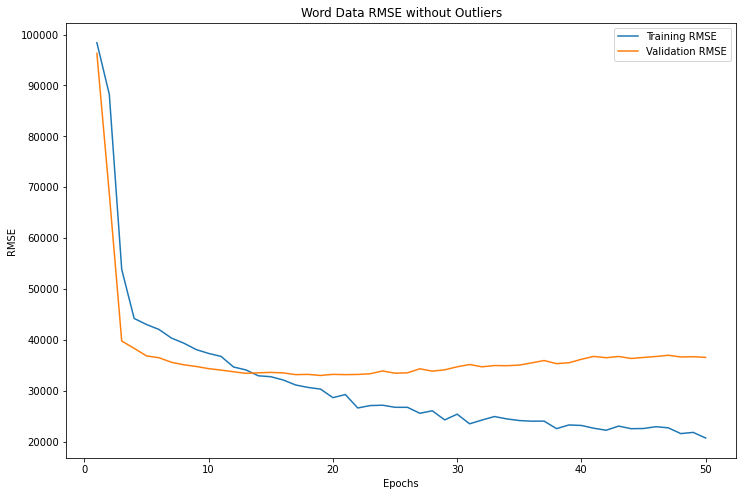

In [20]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mse_iqr.history

rmse_values = np.sqrt(model_dict['mse']) 
val_rmse_values = np.sqrt(model_dict['val_mse'])

epochs = range(1, len(rmse_values) + 1)
ax.plot(epochs, rmse_values, label='Training RMSE')
ax.plot(epochs, val_rmse_values, label='Validation RMSE')
plt.legend()
plt.title('Word Data RMSE without Outliers')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

### Loss on MAE

In [21]:
# Building Model
model_mae_iqr = models.Sequential()
model_mae_iqr.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mae_iqr.add(layers.Dense(units=50,activation='relu'))
model_mae_iqr.add(layers.Dropout(rate=0.3))
model_mae_iqr.add(layers.Dense(units=50,activation='relu'))
model_mae_iqr.add(layers.Dropout(rate=0.3))
model_mae_iqr.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mae_iqr.compile(optimizer='adam',
             loss='mae',
             metrics=['mae'])

In [22]:
# Training Step
history_mae_iqr = model_mae_iqr.fit(np.array(X_train_val_iqr), y_train_val_iqr,
                                    batch_size=5,epochs=50,
                                    validation_data=(np.array(X_val_iqr),y_val_iqr))

Epoch 1/50
186/186 [==============================] - 0s 1ms/step - loss: 86253.6250 - mae: 86253.6250 - val_loss: 86637.1094 - val_mae: 86637.1094
Epoch 2/50
186/186 [==============================] - 0s 809us/step - loss: 67564.2188 - mae: 67564.2109 - val_loss: 42367.6211 - val_mae: 42367.6211
Epoch 3/50
186/186 [==============================] - 0s 831us/step - loss: 36151.0664 - mae: 36151.0664 - val_loss: 30777.2422 - val_mae: 30777.2422
Epoch 4/50
186/186 [==============================] - 0s 871us/step - loss: 33378.9336 - mae: 33378.9336 - val_loss: 29607.4551 - val_mae: 29607.4551
Epoch 5/50
186/186 [==============================] - 0s 793us/step - loss: 31694.2832 - mae: 31694.2832 - val_loss: 29999.0977 - val_mae: 29999.0977
Epoch 6/50
186/186 [==============================] - 0s 833us/step - loss: 30260.9023 - mae: 30260.9023 - val_loss: 28922.1074 - val_mae: 28922.1074
Epoch 7/50
186/186 [==============================] - 0s 809us/step - loss: 28682.0703 - mae: 28682.07

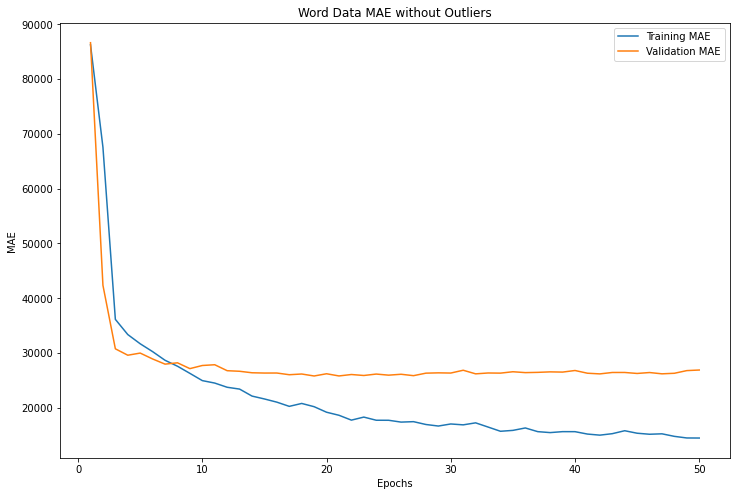

In [23]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mae_iqr.history

mae_values = model_dict['mae']
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.legend()
plt.title('Word Data MAE without Outliers')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

# Findings
- Loss on MAE produced the lowest error overall
- Removing outliers improved model performance

# Final Stats

In [24]:
y_test_preds = model_mae_iqr.predict(np.array(X_test_iqrf))
y_train_preds = model_mae_iqr.predict(np.array(X_train_val_iqr))

In [25]:
print("Average Views:",round(y_iqr.mean()[0]))
print("Train MAE:",round(mean_absolute_error(y_train_val_iqr,y_train_preds)))
print("Test MAE:",round(mean_absolute_error(y_test_iqrf,y_test_preds)))

Average Views: 107615
Train MAE: 9218
Test MAE: 31406


# Exporting MAE Model without Outliers

In [28]:
model_mae_iqr.save(r'Data\model.h5')
model_mae_iqr.save_weights(r'Data\model_weights.h5')